In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as dset
import torchvision.transforms as T

import matplotlib.pyplot as plt

In [2]:
batch_size = 64

mnist_train = dset.MNIST('../data', train=True, download=True, transform=T.ToTensor())
loader_train = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
mnist_test = dset.MNIST('../data', train=False, download=True, transform=T.ToTensor())
loader_test = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

In [3]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size()
        return x.view(N, -1)

In [4]:
class Model(nn.Module):
    def __init__(self, num_classes):
        super(Model, self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            Flatten(),
            nn.Linear(64 * 2 * 2, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(1024, 10),
        )

    def forward(self, x):
        return self.network(x)

In [5]:
model = Model(10)
lossfn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [6]:
def train(model, loss_fn, optimizer, costs, num_epochs=1):
    for epoch in range(num_epochs):
        loss = None
        for t, (x, y) in enumerate(loader_train):
            y_hat = model(x)
            loss = lossfn(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        costs.append(loss.data[0])
        if (epoch + 1) % (num_epochs / 10) == 0:
            print('Epoch = %d, loss = %.4f' % (epoch + 1, costs[-1]))

In [7]:
def train(model, loss_fn, optimizer, hist, num_epochs=1):
    model.train()
    for epoch in range(num_epochs):
        for t, (x, y) in enumerate(loader_train):
            optimizer.zero_grad()
            y_hat = model(x)
            loss = lossfn(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if t % 10 == 0:
                hist.append(loss)
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, t * len(x), len(loader_train.dataset),
                           100. * t / len(loader_train), loss.data[0]))

In [8]:
def check_accuracy(model, loader):
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')
    num_correct = 0
    num_samples = 0
    model.eval()
    for x, y in loader:
        scores = model(x)
        _, preds = scores.max(1)
        num_correct += (preds == y).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.310197
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.180712
Train Epoch: 0 [1280/60000 (2%)]	Loss: 1.826414
Train Epoch: 0 [1920/60000 (3%)]	Loss: 1.146514
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.854822
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.708160
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.444365
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.366914
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.523608
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.567051
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.307768
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.214319
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.224873
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.518572
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.445372
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.222958
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.281572
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.195792
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.218610
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.211129
Train Epoch: 0 [12800/60000 (

Train Epoch: 3 [30720/60000 (51%)]	Loss: 0.012993
Train Epoch: 3 [31360/60000 (52%)]	Loss: 0.019094
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.043172
Train Epoch: 3 [32640/60000 (54%)]	Loss: 0.036041
Train Epoch: 3 [33280/60000 (55%)]	Loss: 0.006401
Train Epoch: 3 [33920/60000 (57%)]	Loss: 0.044868
Train Epoch: 3 [34560/60000 (58%)]	Loss: 0.073872
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.011043
Train Epoch: 3 [35840/60000 (60%)]	Loss: 0.035129
Train Epoch: 3 [36480/60000 (61%)]	Loss: 0.005589
Train Epoch: 3 [37120/60000 (62%)]	Loss: 0.025495
Train Epoch: 3 [37760/60000 (63%)]	Loss: 0.002999
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.022615
Train Epoch: 3 [39040/60000 (65%)]	Loss: 0.195273
Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.092055
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.082303
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.038987
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.002209
Train Epoch: 3 [42240/60000 (70%)]	Loss: 0.114504
Train Epoch: 3 [42880/60000 (71%)]	Loss: 0.002383


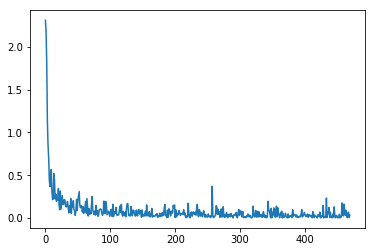

In [55]:
costs = []
train(model, lossfn, optimizer, costs, num_epochs=5)
check_accuracy(model, loader_test)

plt.plot(costs)
plt.show()

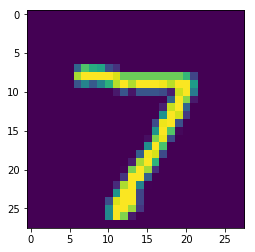

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# img = mpimg.imread('stinkbug.png')
# plt.imshow(img)
for x, y in mnist_test:
    plt.imshow(x.data.numpy()[0])
    break
#     y_hat = model.forward(x)
#     print(y_hat)
#     break